# Broadcast and Accumulator

https://spark.apache.org/docs/latest/rdd-programming-guide.html#broadcast-variables
    
For parallel processing, Apache Spark uses shared variables. 

A copy of shared variable goes on each node of the cluster when the driver 
sends a task to the executor on the cluster, so that it can be used for performing tasks.

There are two types of shared variables supported by Apache Spark −

- Broadcast
- Accumulator

Let us understand them in detail.

# Broadcast
Broadcast variables are used to save the copy of data across all nodes. This variable is cached on all the machines and not sent on machines with tasks. 

The following code block has the details of a Broadcast class for PySpark.

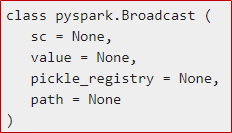

# Broadcast Variable

The following example shows how to use a Broadcast variable. 

A Broadcast variable has an attribute called value, 
which stores the data and is used to return a broadcasted value

In [5]:
from pyspark import SparkContext 
#sc = SparkContext("local", "Broadcast app") 
sc = SparkContext.getOrCreate()
# Broadcast all variables to all nodes.
words_new = sc.broadcast(["scala", "java", "hadoop", "spark", "akka"]) 
# Get the broadcat variable from distributed nodes and store in local node
data = words_new.value 
# print the data on local node.
print ("Stored data -> %s" % (data)) 
# Get the braocasr variable from distrubted node into local varaible.
elem = words_new.value[2] 
print ("Printing a particular element in RDD -> %s" % (elem))

Stored data -> ['scala', 'java', 'hadoop', 'spark', 'akka']
Printing a particular element in RDD -> hadoop


# Accumulator

Accumulator variables are used for aggregating the information through associative 
and commutative operations. 

For example, you can use an accumulator for a sum operation or counters (in MapReduce). 

The following is Accumulator class for PySpark.

class pyspark.Accumulator(aid, value, accum_param)

The following example shows how to use an Accumulator variable. 

An Accumulator variable has an attribute called value that is similar to what a 
broadcast variable has. 

It stores the data and is used to return the 
accumulator's value, but usable only in a driver program.

In this example, an accumulator variable is used by multiple workers and returns 
an accumulated value.

In [10]:
from pyspark import SparkContext 
# sc = SparkContext("local", "Accumulator app") 
# Get the Saprk Context
sc = SparkContext.getOrCreate()
# run Accumulattor on distrubted Node
num = sc.accumulator(10) 
def f(x): 
   global num 
   num+=x 
# Parallelized the RDD (Resilient Distributed Dataset)
rdd = sc.parallelize([20,30,40,50]) 
# foreach on distribued Node
rdd.foreach(f) 
# Get the result from ditributed Node
# https://spark.apache.org/docs/1.6.1/api/java/org/apache/spark/Accumulator.html
# spark accumulator.value
final = num.value 
print ("Accumulated value is -> %i" % (final))

Accumulated value is -> 150


# Run on Anaconda terminal

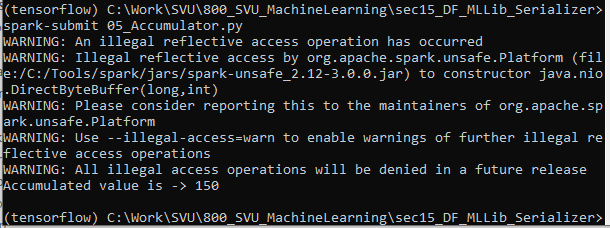